# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

## Import Dataset


In [ ]:
data = pd.read_csv('EasyVisa.csv')
# copying data to another varaible to avoid any changes to original data
df = data.copy()

## Overview of Dataset
- Observations
- Sanity checks

### First and Last 5 rows

In [ ]:
# for checking first 5 rows
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# for checking last 5 rows
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


Observations:

The dataset contains the various information about the Visa applicants and whether or not Visa was granted to them.

### Shape of the dataset

In [ ]:
# for checking the number of rows and columns
df.shape

(25480, 12)

There are **25,480** rows and **12** columns in the dataset.

### Information regarding data types, duplicate & missing values

In [ ]:
# for checing the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# for checking missing values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# checking for duplicate values
df[df.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

Observations:

* There are 3 datatypes in the dataset namely float, integer and object
* 9 columns are of object datatype, 2 are of integer datatype and the rest 1 column is of float datatype
* There are no null values and no duplicate values in the dataset.

`We can convert the object type columns to categories.
converting "objects" to "category" reduces the data space required to store the dataframe`


**Fixing the data types**

In [ ]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [ ]:
for i in cols.columns:
    df[i] = df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


we can see that the memory usage has reduced from 2.3+ KB to 2 KB

### Statistical Summary

In [ ]:
# to find the statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
* `case_id` an ID variable and not useful for predictive modelling
* 6 total continents and most of the applicants are from Asia
* Most of the applicants hold a Bachelor's degree
* Most of the applicants have job experience and do not require any job training
* Average number of employees in the listed US companies is 5667.There are some negative values in number of employees which do not make sense, so needs to be dropped
* Year of establishment of the companies varies with a wide range from 1800 to 2016, mean is less than the median established year indicating the data is left skewed
*  There are 5 regions of employment, Northeast having the highest need of employees
* Average wage is 74,456 whereas median is 70,308
* There are 4 units of measuring wage, year being the most popular one
* Most of the jobs are full time
* Most of them have been certified with visa

In [ ]:
# drop the case id
df.drop(['case_id'],axis=1,inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# drop the negative values in no of employee column
df.drop(df[(df['no_of_employees']<=0)].index, inplace=True)
df.shape

(25447, 11)

33 entries dropped

**Let's look at the unique values of all the categories**

In [ ]:
cat_cols= df.select_dtypes(['category'])

In [ ]:
for i in cat_cols.columns:
    print('Unique values in',i, 'are :')
    print(cat_cols[i].value_counts())
    print('*'*50)

Unique values in continent are :
Asia             16840
Europe            3727
North America     3287
South America      851
Africa             550
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10220
Master's        9622
High School     3416
Doctorate       2189
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14786
N    10661
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22498
Y     2949
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7189
South        7006
West         6578
Midwest      4299
Island        375
Name: region_of_employment, dtype: int64
*************************************

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

#### Define the functions to carry out the EDA

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### No of Employees


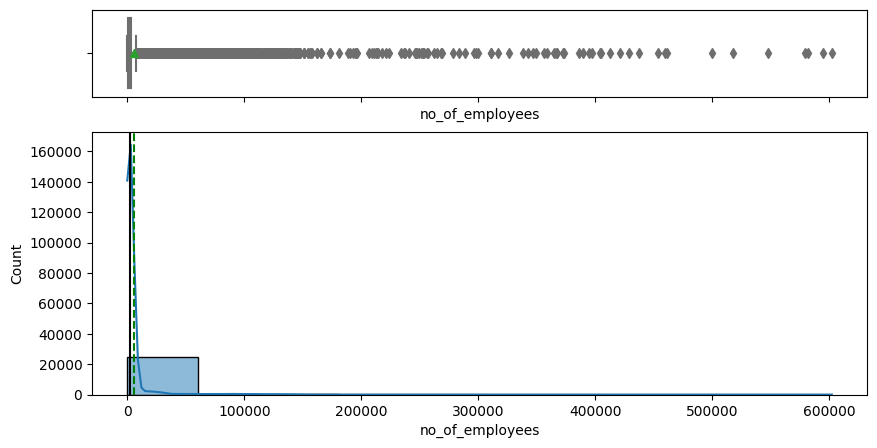

In [ ]:
histogram_boxplot(df, 'no_of_employees', figsize=(10, 5), kde=True, bins=10)

Heavily right skewed distribution, i.e. the companies that already have a higher no of employees have a lesser applicants

#### Year of Establishment


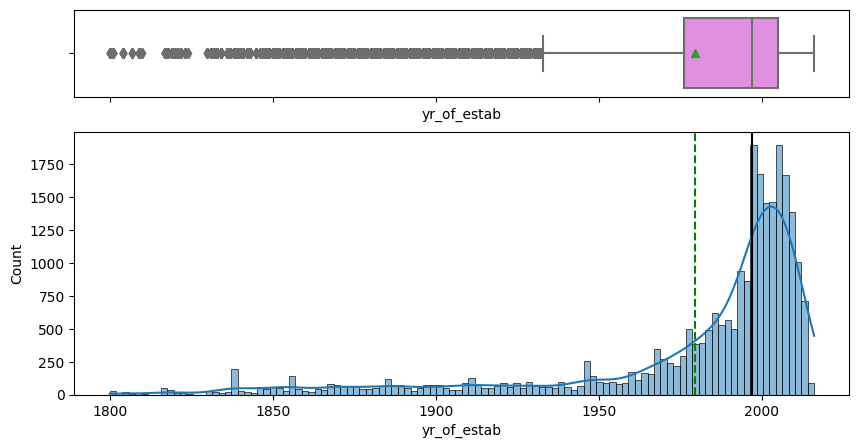

In [ ]:
histogram_boxplot(df, 'yr_of_estab', figsize=(10, 5), kde=True)

Heavily left skewed meaning older companies are few in numbers, more companies are there after 1950s

#### Prevailing Wage


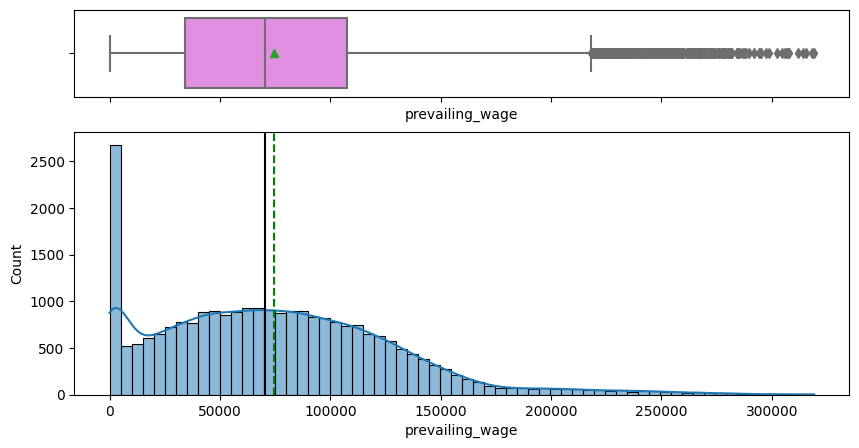

In [ ]:
histogram_boxplot(df, 'prevailing_wage', figsize=(10, 5), kde=True)

The pattern is weird because the prevailing_wage is not stored in a uniform manner as it depends on the unit of wage and there are 4 differents units of wage present in the dataset

#### Unit of Wage


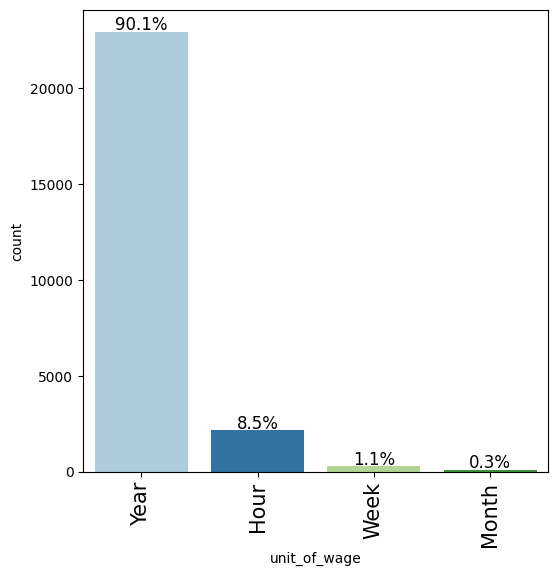

In [ ]:
labeled_barplot(df, 'unit_of_wage', perc=True);

Almost 90% uses year as unit of wage

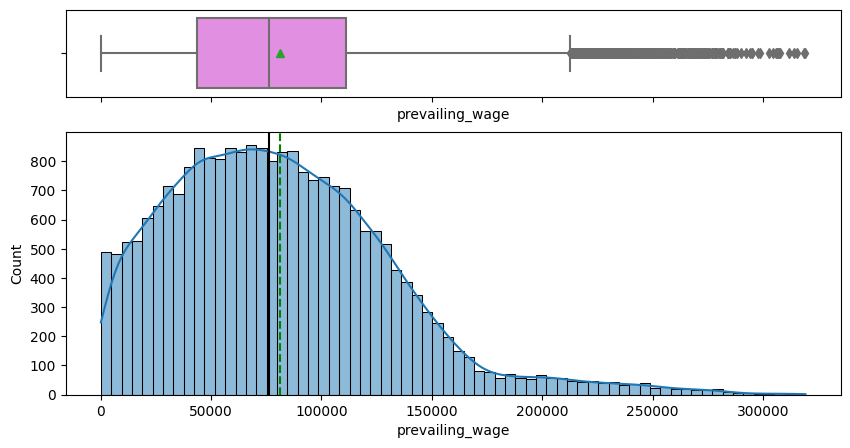

In [ ]:
# by Year
histogram_boxplot(df[(df['unit_of_wage']== 'Year')], 'prevailing_wage', figsize=(10, 5), kde=True)

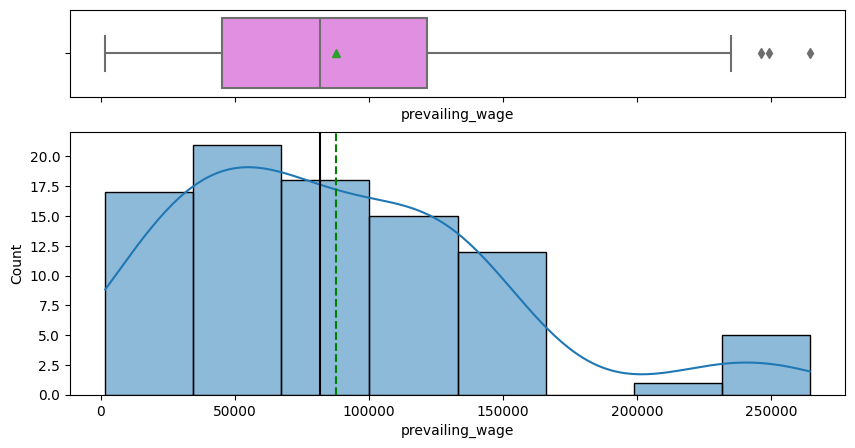

In [ ]:
# by Month
histogram_boxplot(df[(df['unit_of_wage']== 'Month')], 'prevailing_wage', figsize=(10, 5), kde=True)

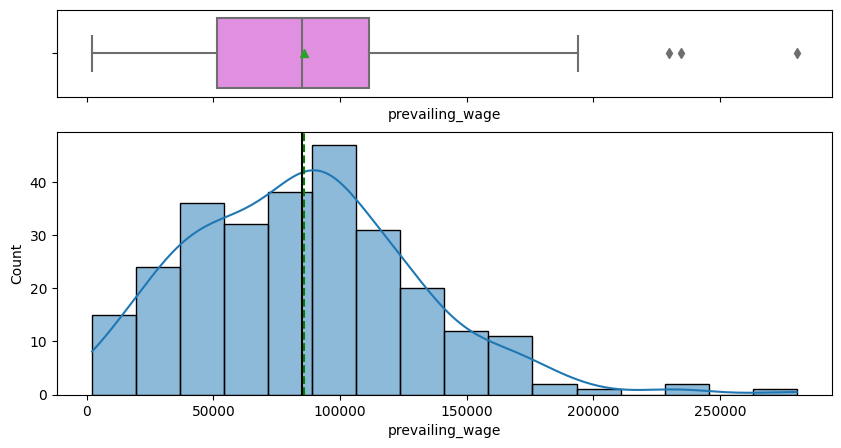

In [ ]:
# by Week
histogram_boxplot(df[(df['unit_of_wage']== 'Week')], 'prevailing_wage', figsize=(10, 5), kde=True)

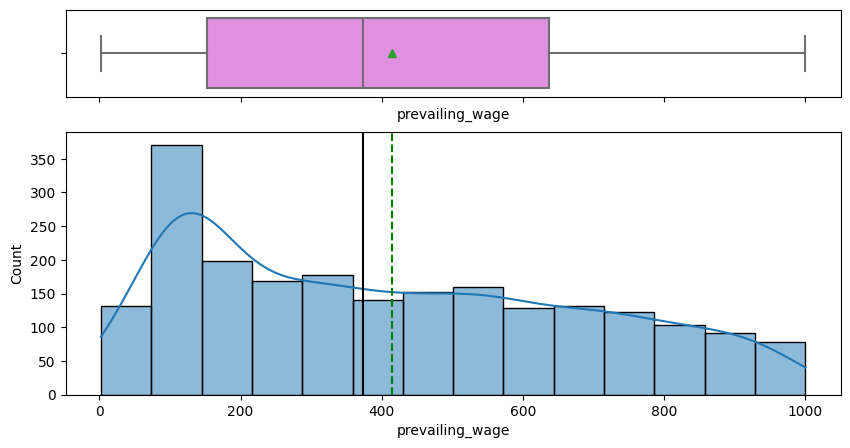

In [ ]:
# by Hour
histogram_boxplot(df[(df['unit_of_wage']== 'Hour')], 'prevailing_wage', figsize=(10, 5), kde=True)

For monthly, weekly and yearly salary, the salaries in reality depend on the total number of hours work done which is not known to us! To solve this problem, we will have to make certain assumptions to convert all the units to a particular unit i.e. hourly to have a uniformity in the dataset

#### Continent



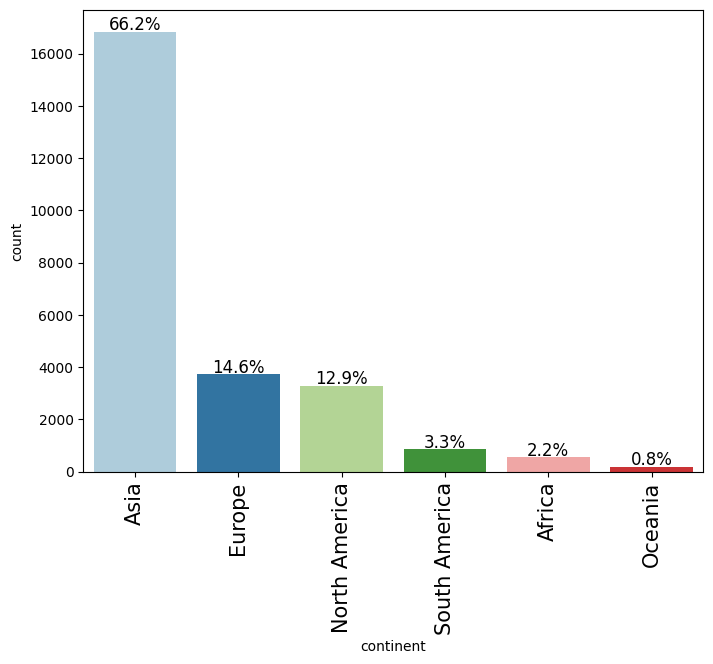

In [ ]:
labeled_barplot(df,'continent', perc=True)

Most of the applicants (66%) are from Asia followed by Europe(~15%)

#### Education of Employees


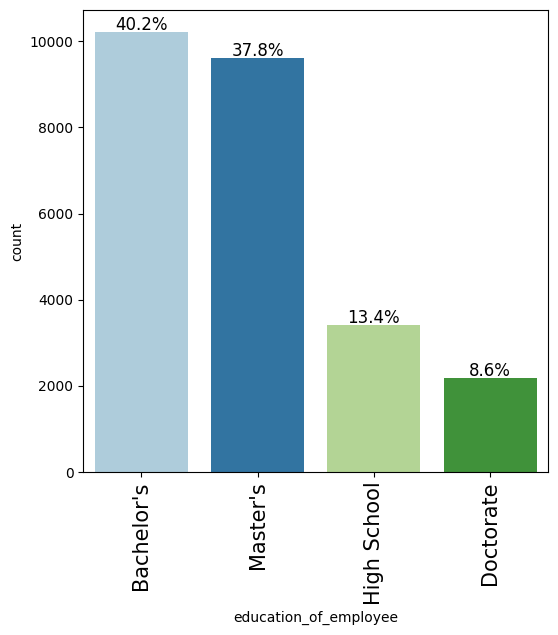

In [ ]:
labeled_barplot(df,'education_of_employee', perc=True)

78% of the applicants have bachelor's and master's degree

#### Job Experience


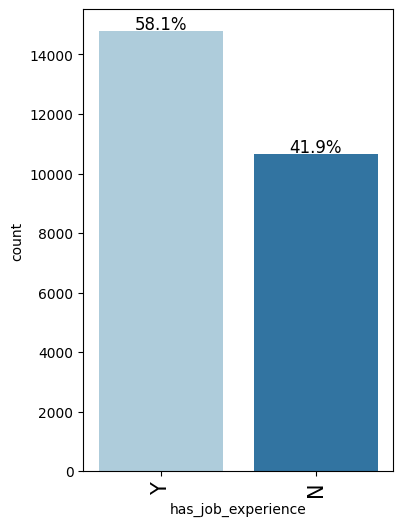

In [ ]:
labeled_barplot(df,'has_job_experience', perc=True)

58% have a job experience

#### Traning requirement

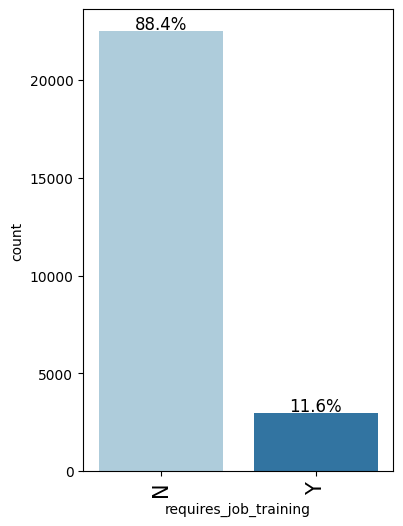

In [ ]:
labeled_barplot(df,'requires_job_training', perc=True)

Most of the applicants (88.4%) do not require any job training

#### Region of employment


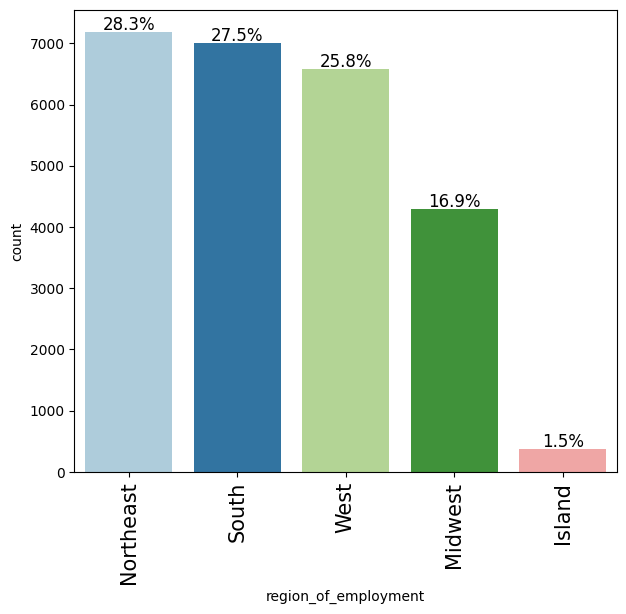

In [ ]:
labeled_barplot(df,'region_of_employment', perc=True)

Northeast, South and West are the top 3 region of employment

#### Type of Position

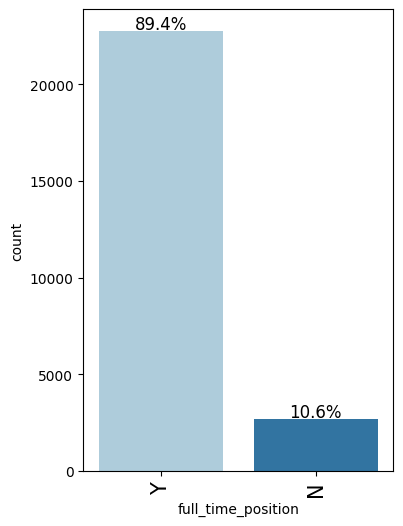

In [ ]:
labeled_barplot(df,'full_time_position', perc=True)

89.4% jobs are full time positions

#### Case Status

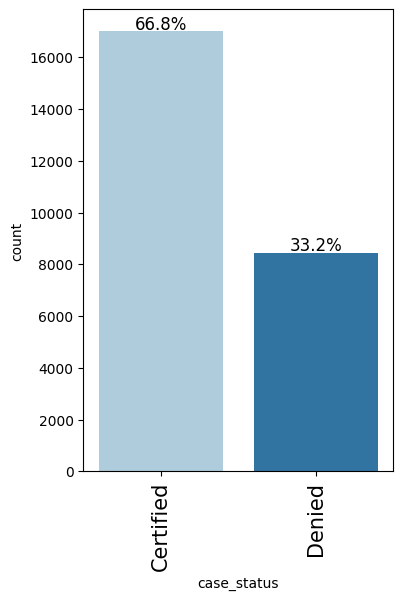

In [ ]:
labeled_barplot(df,'case_status', perc=True)

Almost 67% applicants are certified with Visa

### Bivariate Analysis

#### Correlation Heatmap

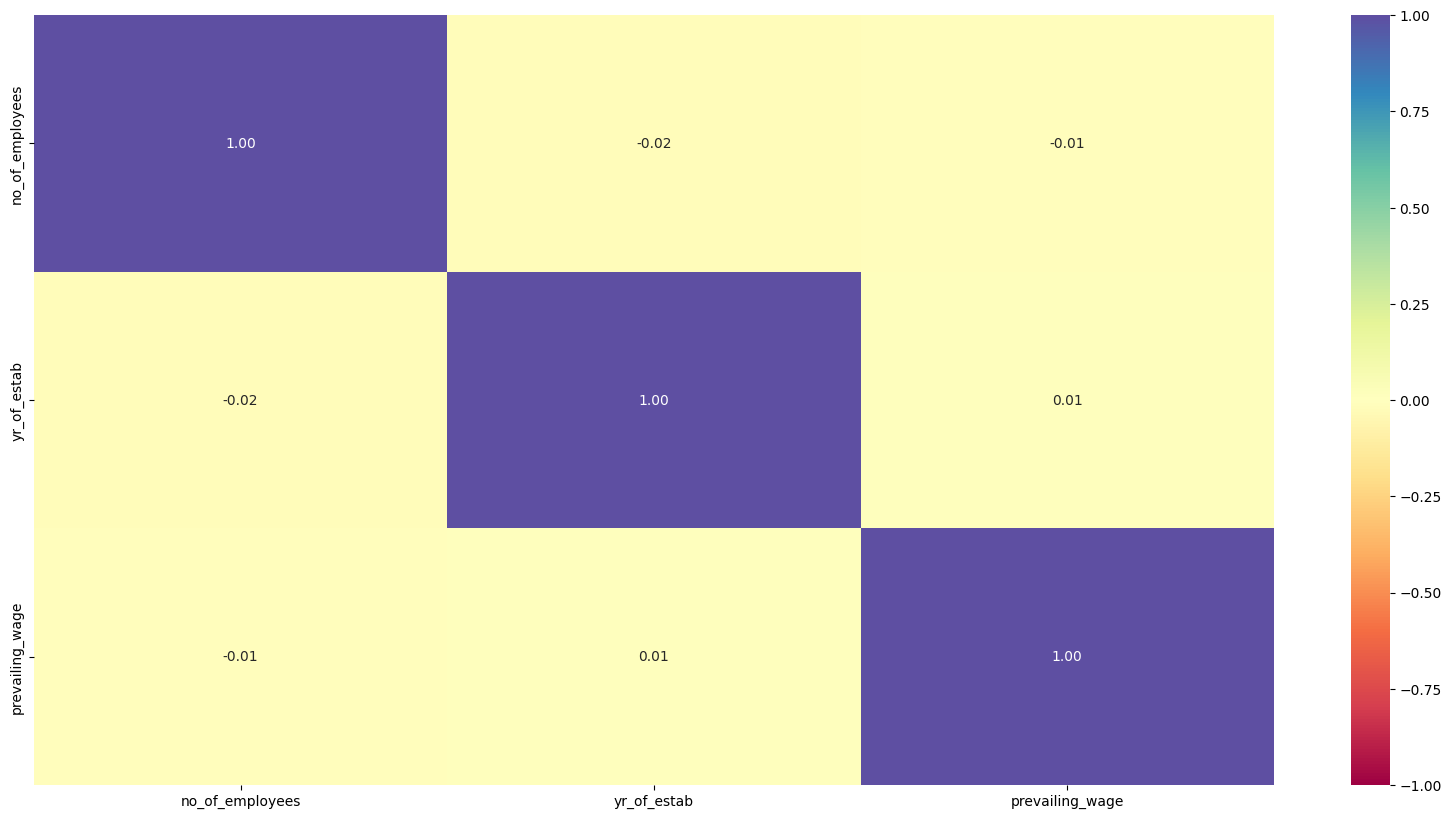

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

The heatmap suggests that is no correlation existing between the numerical columns

####Case status vs No of employees

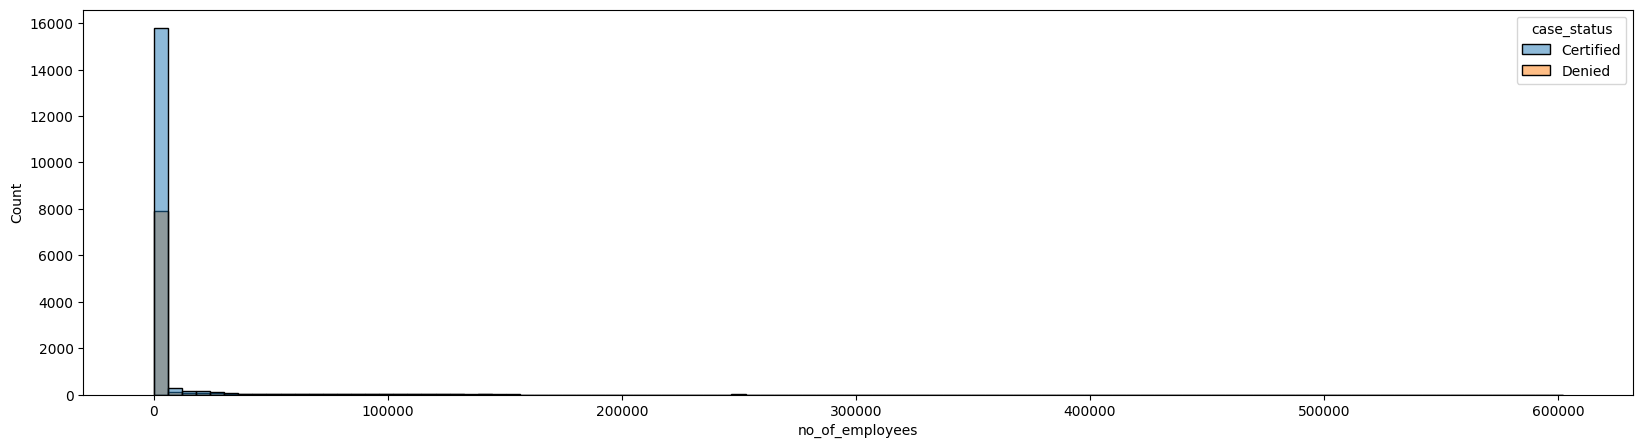

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(df, x='no_of_employees', hue='case_status', bins = 100);

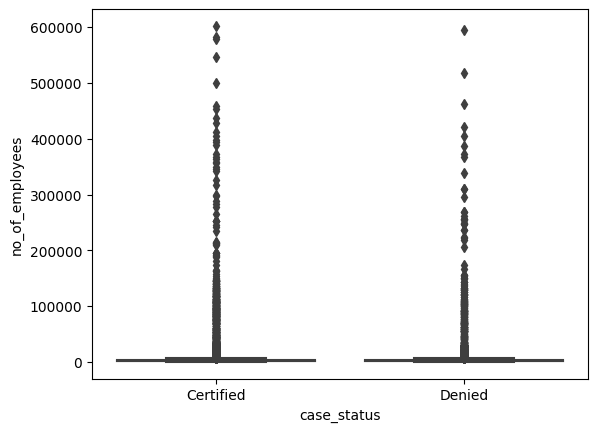

In [ ]:
sns.boxplot(df, y='no_of_employees', x='case_status');

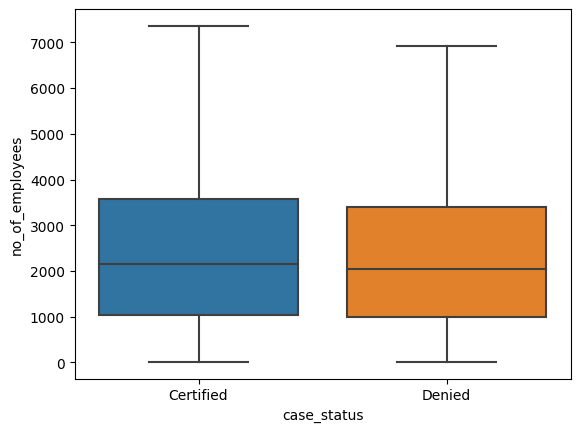

In [ ]:
sns.boxplot( data=df,y='no_of_employees', x='case_status', showfliers=False);

No of employees do not have any effects on visa approval

####Case status vs Year of establishment

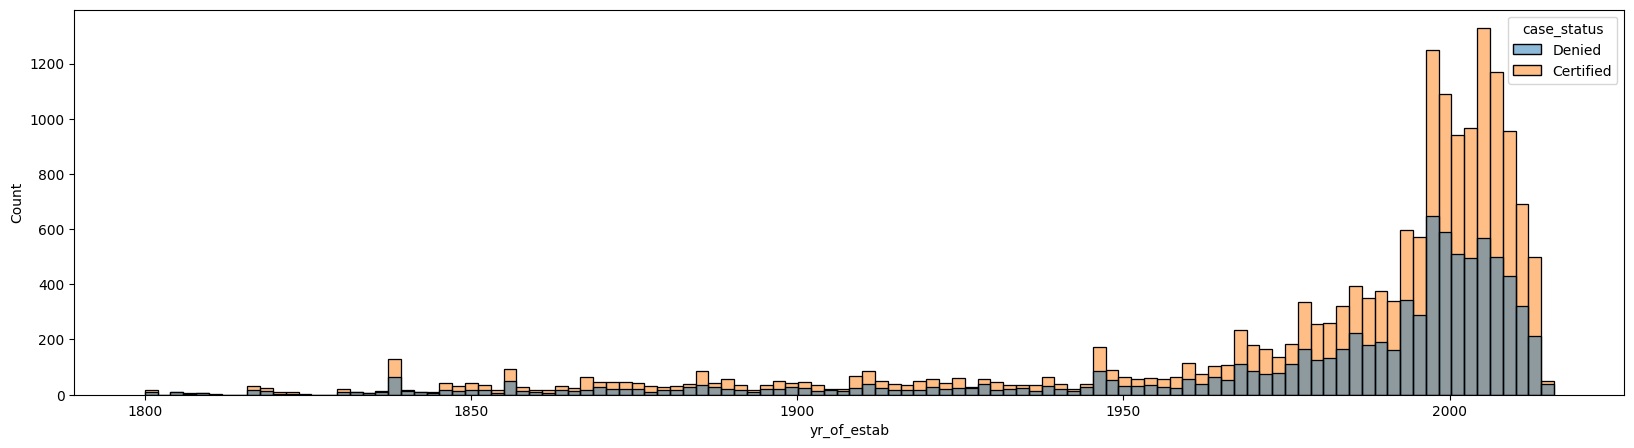

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(df, x='yr_of_estab', hue='case_status');

<Axes: xlabel='case_status', ylabel='yr_of_estab'>

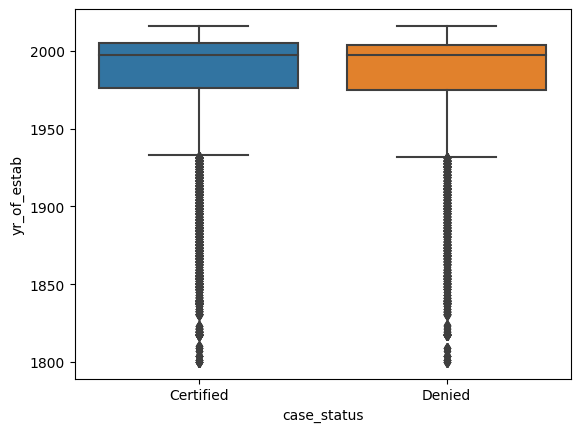

In [ ]:
sns.boxplot(df, y='yr_of_estab', x='case_status');

Year of establishment of companies also don't have any significant effect on visa approval

#### Case status vs Prevailing wage

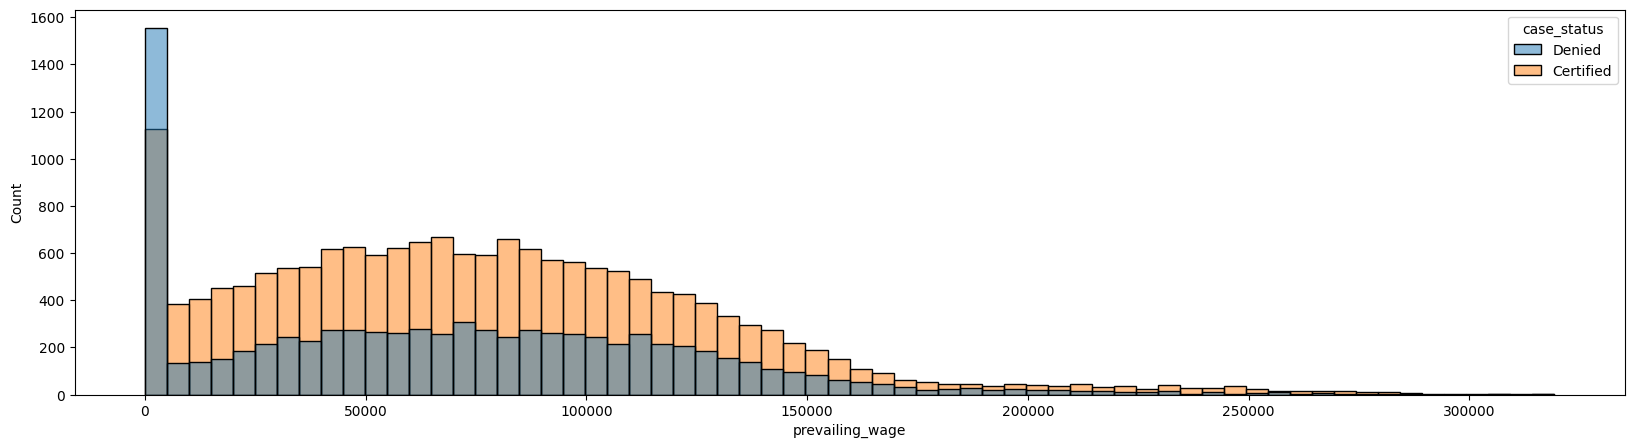

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(df, x='prevailing_wage', hue='case_status');

<Axes: xlabel='case_status', ylabel='prevailing_wage'>

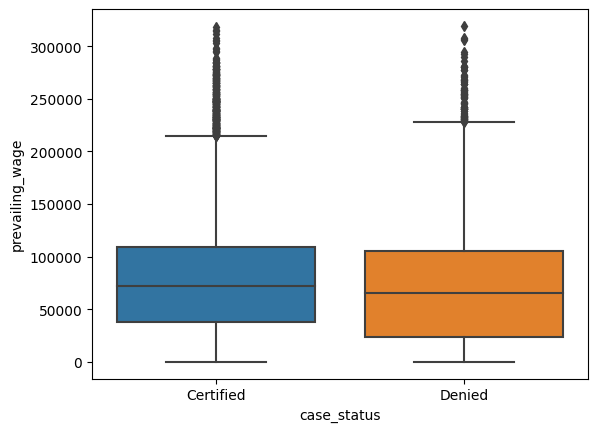

In [ ]:
sns.boxplot(df, y='prevailing_wage', x='case_status')

Again, prevailing wage is also not a significant factor effecting visa approval

#### Define the functions to carry out the EDA

In [ ]:
def labeled_barplot2(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    ax = sns.countplot(
        data=data,
        x=feature,
        palette='viridis',
        order=order,
        hue=feature_2,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points"
        )  # annotate the percentage

    plt.show()  # show the plot

#### Case Status vs Unit of wage

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


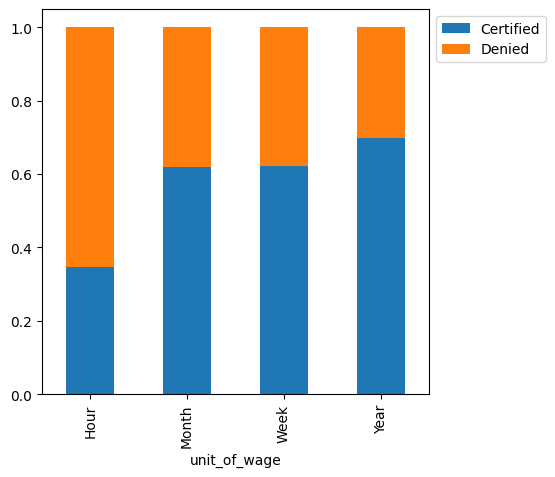

In [ ]:
stacked_barplot(df, 'unit_of_wage', 'case_status')

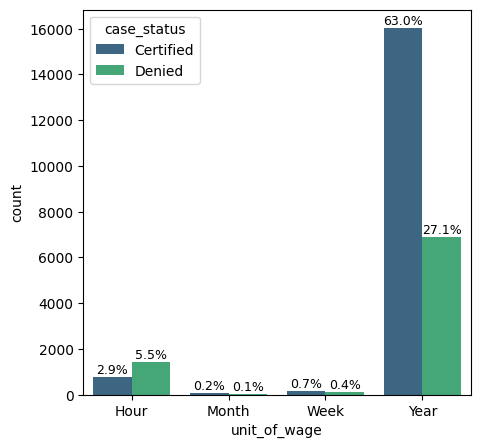

In [ ]:
labeled_barplot2(df,'unit_of_wage', 'case_status', order= None, perc=True)

Yearly unit of wage has got most visa approved and % of applicants with yearly unit of wage getting approved is also the highest

#### Case Status vs Continent

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


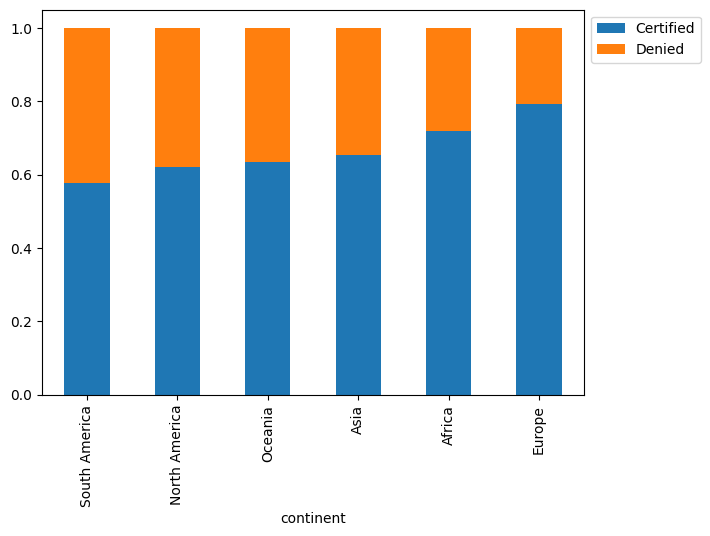

In [ ]:
stacked_barplot(df, 'continent', 'case_status')

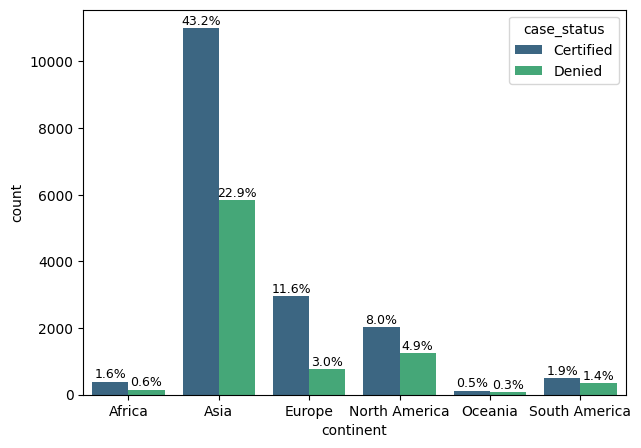

In [ ]:
labeled_barplot2(df,'continent', 'case_status', order= None, perc=True)

- Asia is most cerified among the visa applications of all the continents.
- Numberwise the order of visa certified: Asia>Europe>North America
- However, applicants from Europe have more % of visa approval
- %wise visa certified: Europe>Africa>Asia

#### Case Status vs Region of employment

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


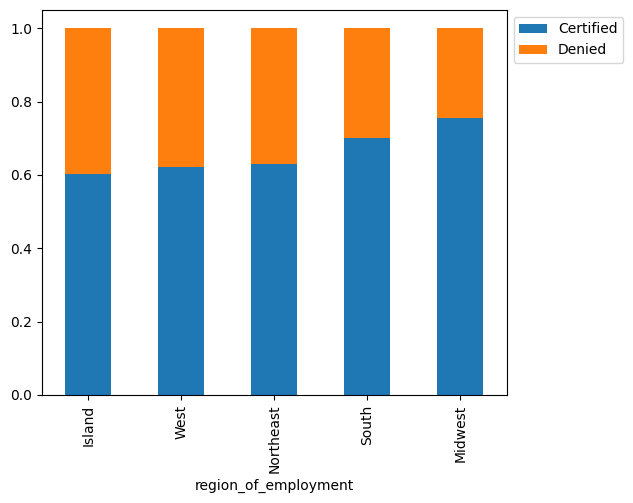

In [ ]:
stacked_barplot(df, 'region_of_employment', 'case_status')

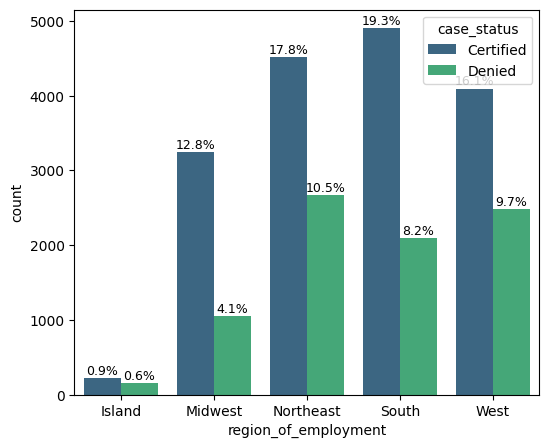

In [ ]:
labeled_barplot2(df,'region_of_employment', 'case_status', order= None, perc=True)

- South region has the most number of visa certification 19%
- Numberwise top 3: South> Northeast > West
- Midwest has the highest % of visa approval
- %wise top 3: Midwest> South> Northeast

#### Case Status vs Education of Employees

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


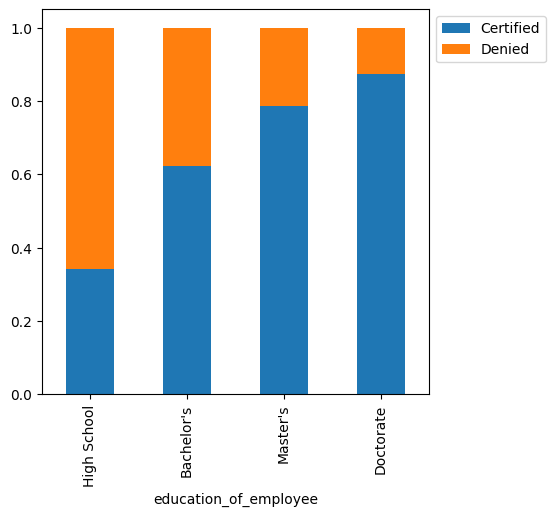

In [ ]:
stacked_barplot(df, 'education_of_employee', 'case_status')

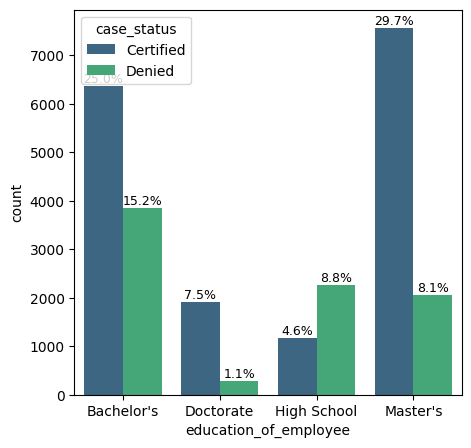

In [ ]:
labeled_barplot2(df,'education_of_employee', 'case_status', order= None, perc=True)

- Master degree has the most number of visa certification followed by Bachelors
- However, Doctorate degree has the highest % of visa approval, Higher the degree, more % of visa approvals is seen

#### Case Status vs Job experience & Training requirements

In [ ]:
# pivot table for job exp. vs training req.
func = lambda x: 100*x.count()/df.shape[0]
pd.pivot_table(df, index='has_job_experience', columns='requires_job_training', values='case_status', aggfunc=func)

requires_job_training,N,Y
has_job_experience,,
N,35.273313,6.621606
Y,53.137894,4.967187


Mostly applicants with no job experience require a training which is merely 7% of them

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


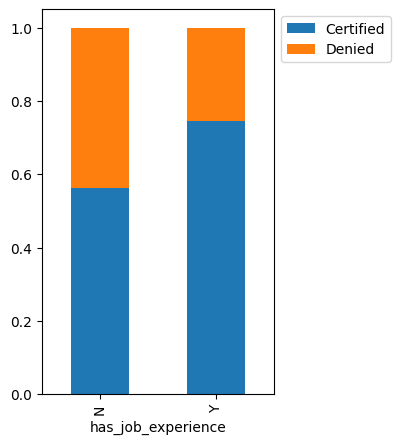

In [ ]:
stacked_barplot(df, 'has_job_experience', 'case_status')

Applicants with job experience more likely to get visa certified both in number and percentage, i.e. most of the visa certified applicants had a job experience and if applicants have job experience chances of getting visa increases.

case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


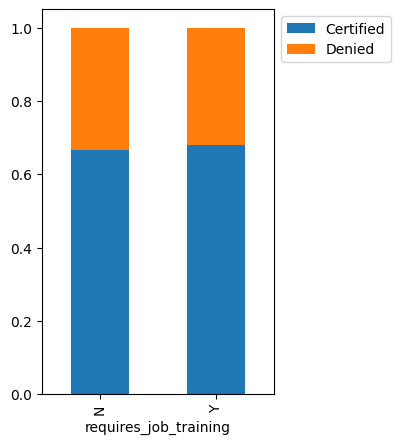

In [ ]:
stacked_barplot(df,'requires_job_training', 'case_status')

Most applicants with certified visa do not need training however % of visa approval is almost same for both.

#### Case Status vs type of position

case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


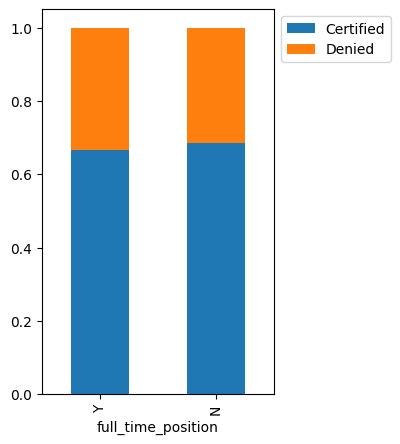

In [ ]:
stacked_barplot(df, 'full_time_position', 'case_status')

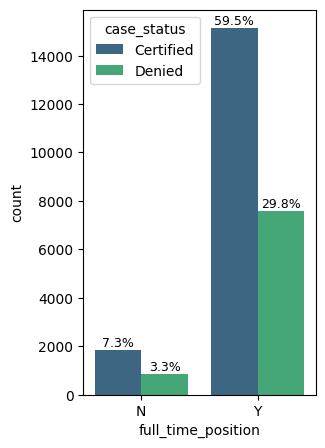

In [ ]:
labeled_barplot2(df,'full_time_position', 'case_status', order= None, perc=True)

Most of the visa certified employees had a full time position but chances of getting visa approved are almost same regardless of the nature of the position

#### **Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
> Yes, it does. Higher the degree, more % of visa approvals is seen.
2. How does the visa status vary across different continents?
> - Asia is most cerified among the visa applications of all the continents.
> - Numberwise the order of visa certified: Asia>Europe>North America
> - However, applicants from Europe have more % of visa approval
> - %wise visa certified: Europe>Africa>Asia

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
> Yes, Applicants with job experience more likely to get visa certified both in number and percentage

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
> Yearly pay

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
> Prevailing wage is not a significant factor effecting visa approval

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment

In [ ]:
# no missing values
# negative values in no_of_employees column have been dropped

### Feature engineering

In [ ]:
# years of establishment --> company age
# max year = 2016

df['comp_age'] = 2016 - df['yr_of_estab']

df.drop(['yr_of_estab'], axis=1, inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,comp_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,9
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,14
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,8
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,119
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,11


In [ ]:
# uniformity in prevailing wage

# for year to hour --> 160*12 = 1920 hrs/year
# for month to hour --> 40*4 = 160 hrs/month
# for week to hour -->  8*5 = 40 hrs/week

df['hourly_wage'] = df['prevailing_wage']

df.loc[df.unit_of_wage == 'Year', 'hourly_wage'] = (df.loc[df.unit_of_wage == 'Year', 'hourly_wage'] / 1920.0)

df.loc[df.unit_of_wage == 'Month', 'hourly_wage'] = (df.loc[df.unit_of_wage == 'Month', 'hourly_wage'] / 160.0)

df.loc[df.unit_of_wage == 'Week', 'hourly_wage'] = (df.loc[df.unit_of_wage == 'Week', 'hourly_wage'] / 40.0)


df.drop('prevailing_wage', axis=1, inplace=True)

df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,unit_of_wage,full_time_position,case_status,comp_age,hourly_wage
0,Asia,High School,N,N,14513,West,Hour,Y,Denied,9,592.202900
1,Asia,Master's,Y,N,2412,Northeast,Year,Y,Certified,14,43.450859
2,Asia,Bachelor's,N,Y,44444,West,Year,Y,Denied,8,64.060865
3,Asia,Bachelor's,N,N,98,West,Year,Y,Denied,119,43.455224
4,Africa,Master's,Y,N,1082,South,Year,Y,Certified,11,78.076766


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25447.0,5674.415334,22891.842245,12.000000,1025.000000,2112.000000,3506.500000,602069.00000
comp_age,25447.0,36.605494,42.385932,0.000000,11.000000,19.000000,40.000000,216.00000
hourly_wage,25447.0,98.014747,278.242823,0.052083,24.532411,43.124526,64.994016,7004.39875


- Mean and median age of companies are 37 and 19 respectively meaning the distribution is right skewed.
- Mean hourly wage is 98 dollars and varies in a wide range from 0.05 to 7004 dollars

### Outliers detection & treatment

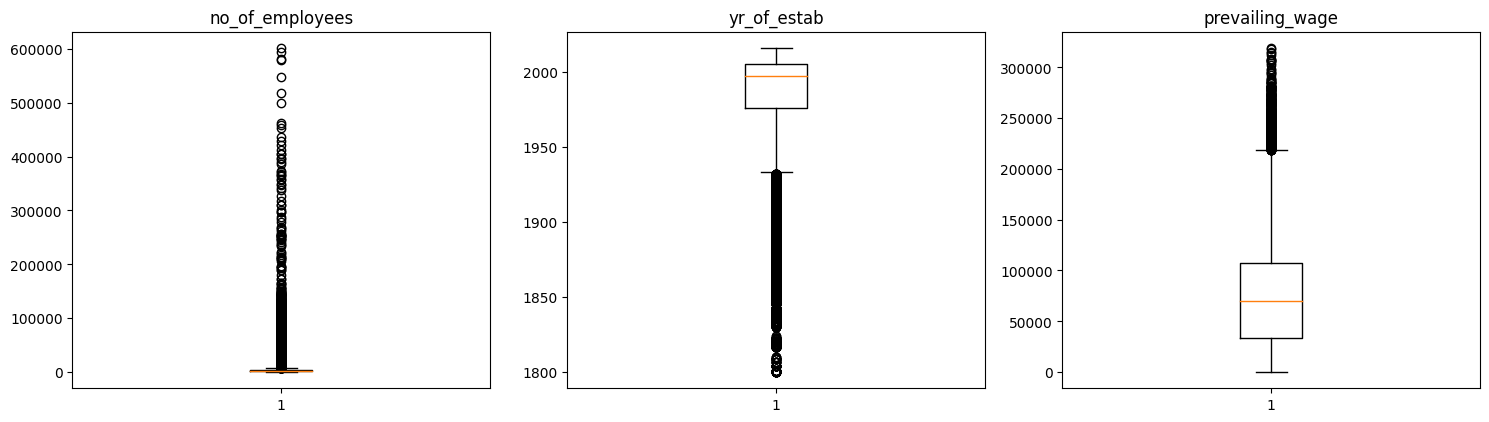

In [ ]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- There are quite a few outliers in the data.
- However, we will not treat them as they are proper values.

### Preparing data for modeling

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* This is done using the `stratify` parameter in the train_test_split function.

In [ ]:
# Creating X and y for model
df['case_status'] = df['case_status'].apply(lambda x: 1 if x == "Certified" else 0)
X = df.drop(['case_status'],axis=1)
y = df['case_status']
# one hot encoding
X = pd.get_dummies(X,drop_first=True)

In [ ]:
X.head()

,no_of_employees,comp_age,hourly_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,...,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,9,592.202900,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,2412,14,43.450859,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,44444,8,64.060865,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,98,119,43.455224,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1082,11,78.076766,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17812, 21) (7635, 21)


In [ ]:
y.value_counts(1)

1    0.668094
0    0.331906
Name: case_status, dtype: float64

In [ ]:
y_train.value_counts(1)

1    0.668089
0    0.331911
Name: case_status, dtype: float64

In [ ]:
y_test.value_counts(1)

1    0.668107
0    0.331893
Name: case_status, dtype: float64

**Let's define function to provide metric scores(accuracy,recall and precision) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## EDA

- It is a good idea to explore the data once again after manipulating it.
- EDA will be performed only for the treated columns

### Company age

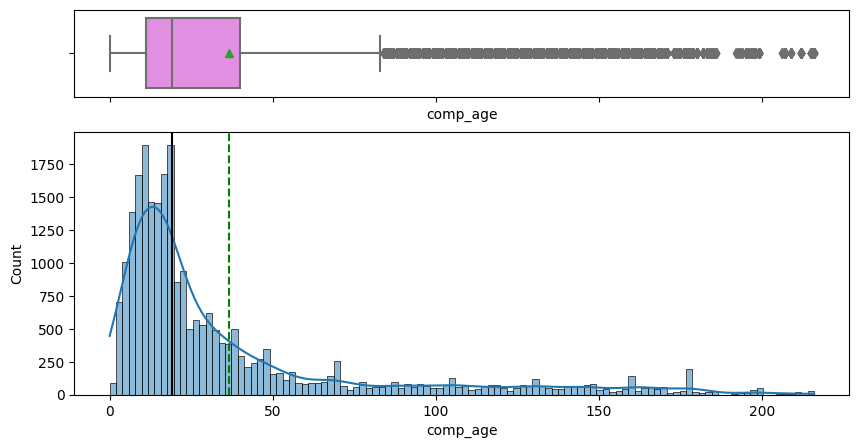

In [ ]:
histogram_boxplot(df, 'comp_age', figsize=(10, 5), kde=True)

Right skewed distribution, most of the companies are less than 50 years old

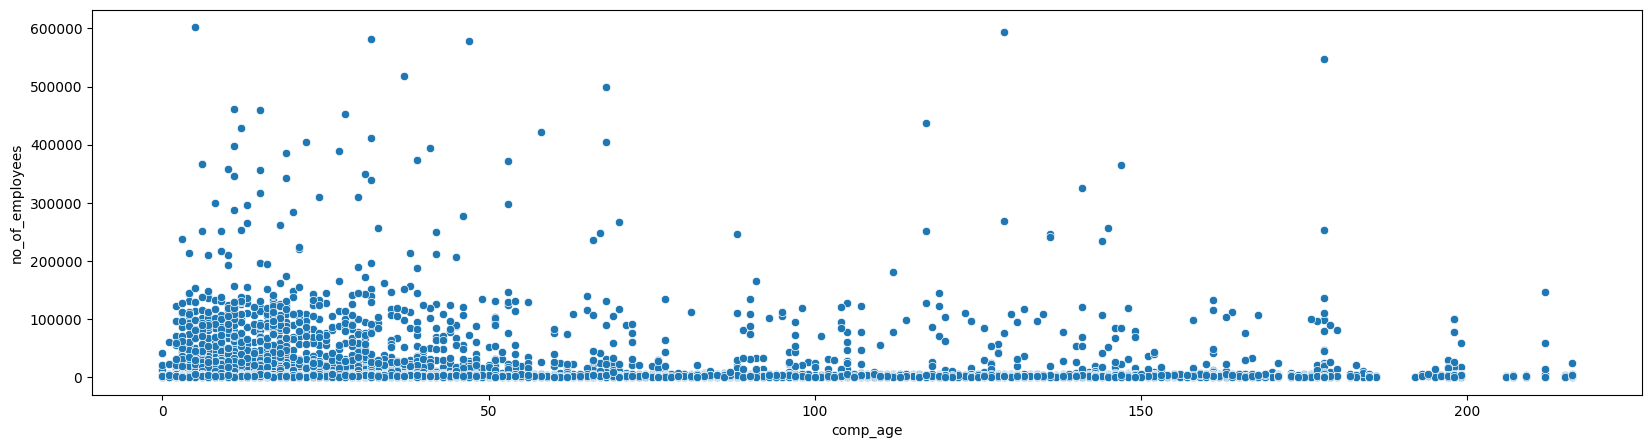

In [ ]:
# company age vs no of employees
plt.figure(figsize=(20,5))
sns.scatterplot(df, x='comp_age', y='no_of_employees');

Older companies seem to have lesser employees compared to newer ones

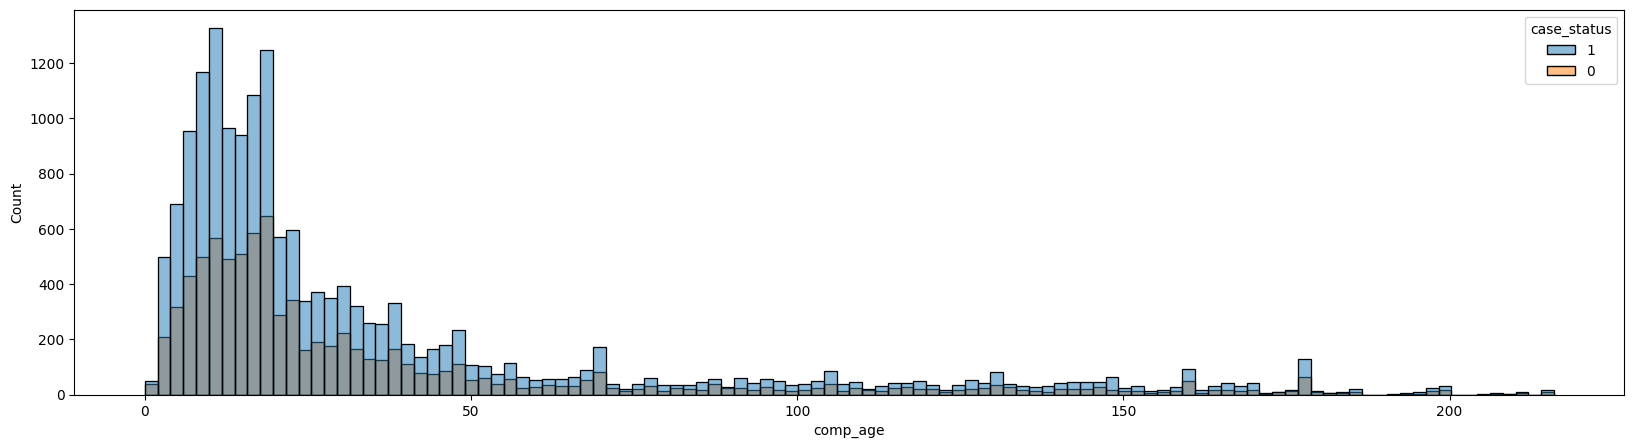

In [ ]:
# company age vs case status
plt.figure(figsize=(20,5))
sns.histplot(df, x='comp_age', hue='case_status');

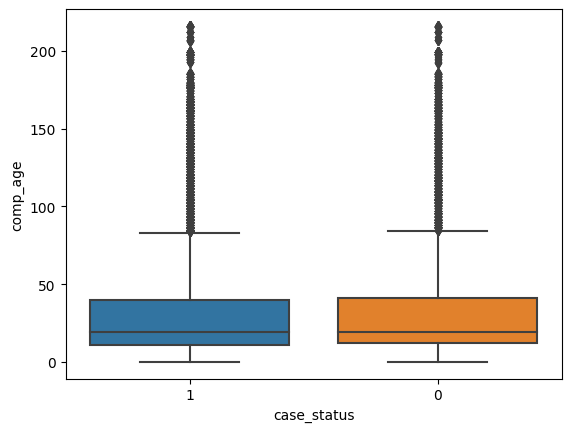

In [ ]:
sns.boxplot(df, y='comp_age', x='case_status');

No significant effect on visa approval

### Hourly wage

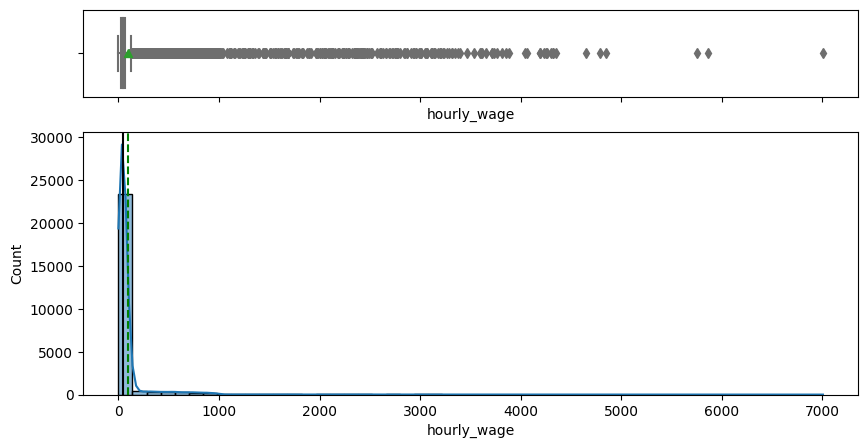

In [ ]:
histogram_boxplot(df, 'hourly_wage', figsize=(10, 5), bins = 50, kde=True)

Heavily right skewed

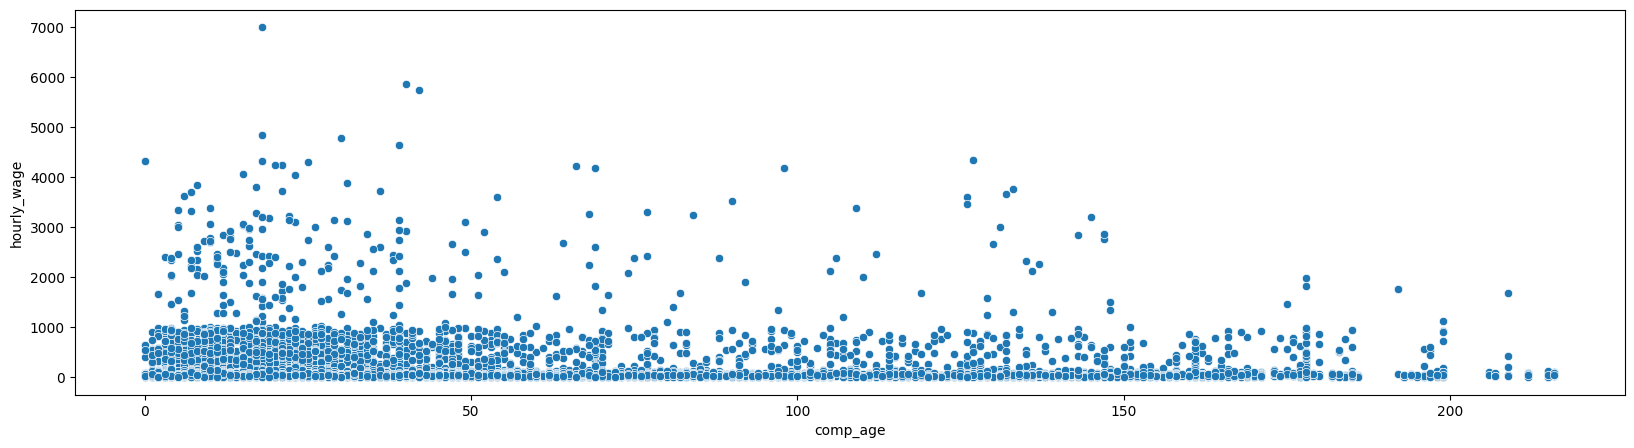

In [ ]:
# hourly wage vs company age
plt.figure(figsize=(20,5))
sns.scatterplot(df, x='comp_age', y='hourly_wage');

Newer companies have slightly higher hourly wages

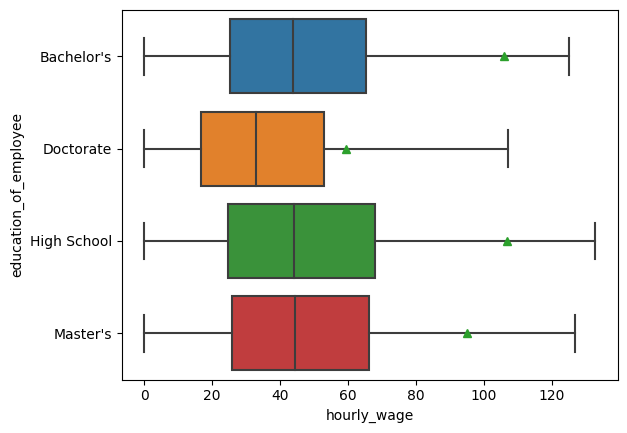

In [ ]:
# hourly wage vs education
sns.boxplot(df, x='hourly_wage', y='education_of_employee', showmeans=True, showfliers=False);

People with bachelors and high school have a higher hourly wage which is quite surprising

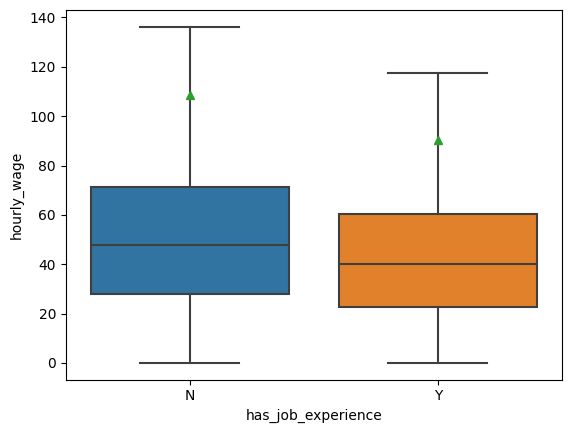

In [ ]:
# hourly wage vs job experience
sns.boxplot(df, y='hourly_wage', x='has_job_experience', showmeans=True, showfliers=False);

People with no job experience have a higher hourly wage which is again a surprising observation

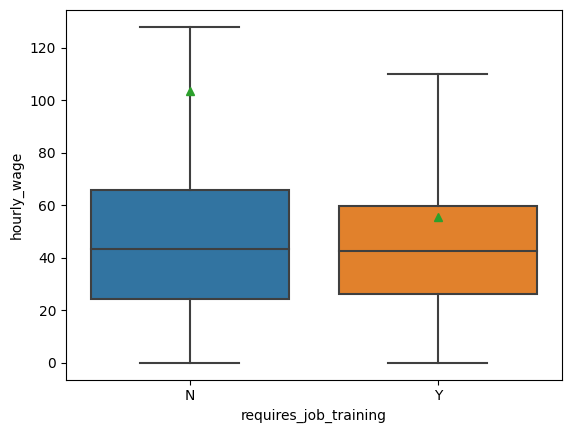

In [ ]:
# hourly wage vs training requirements
sns.boxplot(df, y='hourly_wage', x='requires_job_training', showmeans=True, showfliers=False);

People who do not require a job training have a higher hourly wage

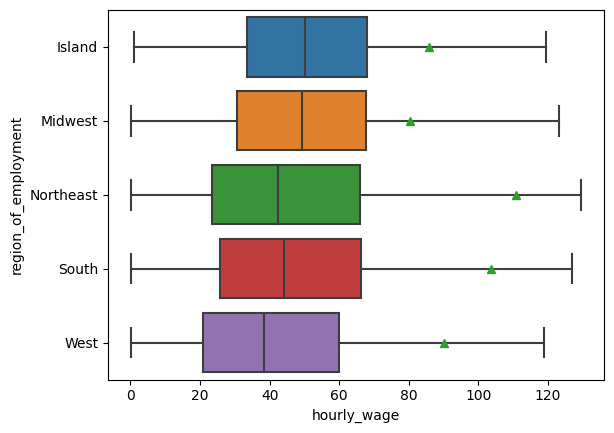

In [ ]:
# hourly wage vs region
sns.boxplot(df, x='hourly_wage', y='region_of_employment', showmeans=True, showfliers=False);

Almost similar hourly wage range across regions

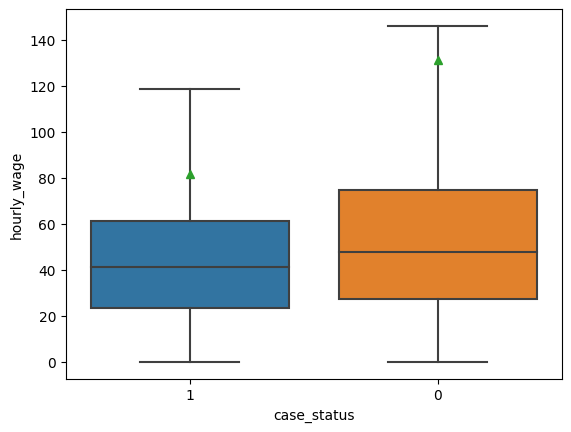

In [ ]:
# hourly wage vs case status
sns.boxplot(df, y='hourly_wage', x='case_status', showmeans=True, showfliers=False);

Lower hourly wages linked with more visa certification

## Decision Tree - Model Building

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight='balanced',random_state=1)

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

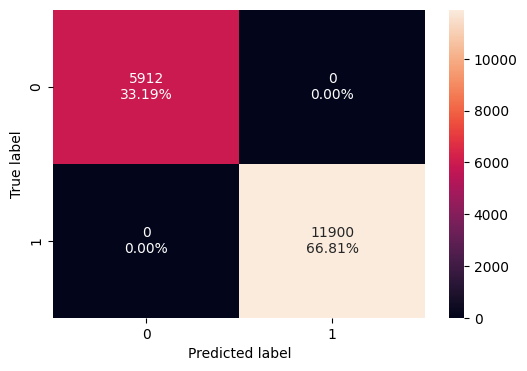

In [ ]:
confusion_matrix_sklearn(dtree, X_train, y_train)

**Confusion Matrix -**

* Applicant was approved and the model predicted approval : True Positive (observed=1,predicted=1)

* Applicant was denied and the model predicted approval : False Positive (observed=0,predicted=1)

* Applicant was denied and the model predicted denial : True Negative (observed=0,predicted=0)

* Applicant was approved and the model predicted denial : False Negative (observed=1,predicted=0)




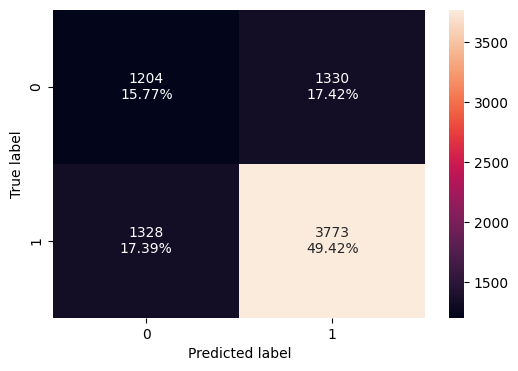

In [ ]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [ ]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n",dtree_model_train_perf)
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.651866  0.739659   0.739369  0.739514


**Observations:**
* Decision tree is not able to generalize well on the data
* It performs well on training data with all performance metrics, i.e., accuracy , recall, precision, and F1-score equal to 1.00
* However, performance on the test data is not as good as that on training data, implying overfitting

## Bagging Model Building

In [ ]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

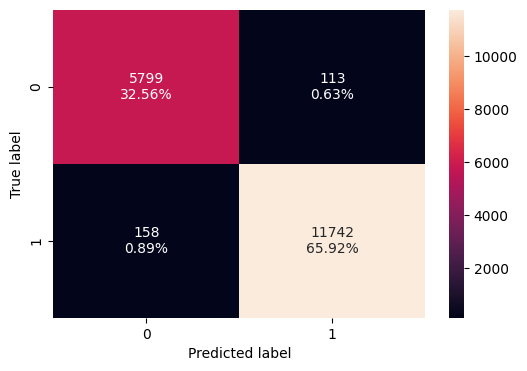

In [ ]:
confusion_matrix_sklearn(bagging, X_train, y_train)

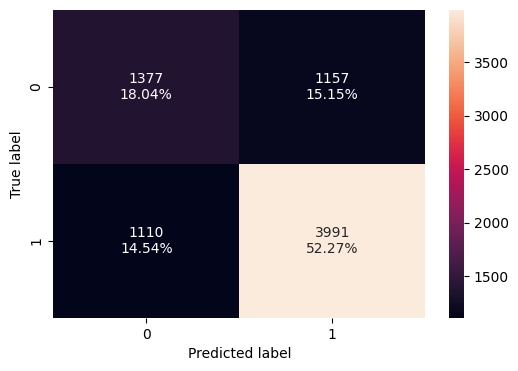

In [ ]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [ ]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.984786  0.986723   0.990468  0.988592
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.703078  0.782396   0.775253  0.778808


**Observations:**
* Bagging classifier is also overfitting on the training set and is performing poorly on the test set
* Although the model has slightly better performance on the test data set than Decision tree

### Bagging Classifier with weighted decision tree

In [ ]:
bagging_wt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1),random_state=1)
bagging_wt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.17,
                                                                      1: 0.83},
                                                        random_state=1),
                  random_state=1)

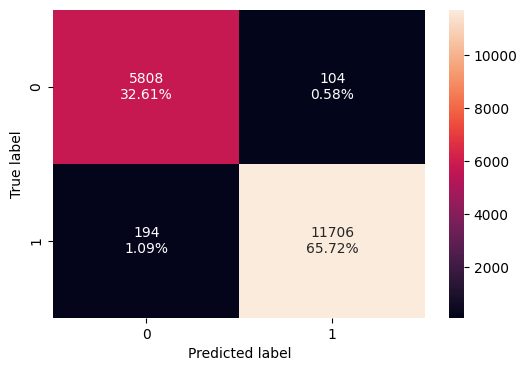

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_train,y_train)

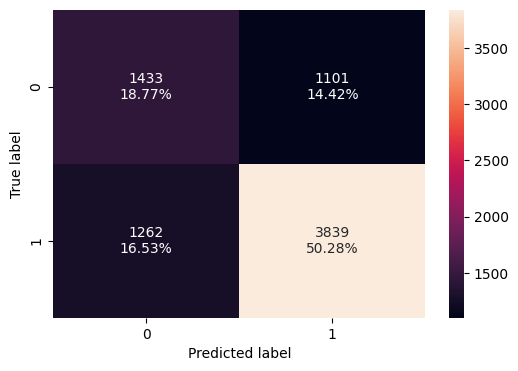

In [ ]:
confusion_matrix_sklearn(bagging_wt,X_test,y_test)

In [ ]:
bagging_wt_model_train_perf=model_performance_classification_sklearn(bagging_wt,X_train,y_train)
print("Training performance \n",bagging_wt_model_train_perf)
bagging_wt_model_test_perf=model_performance_classification_sklearn(bagging_wt, X_test, y_test)
print("Testing performance \n",bagging_wt_model_test_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0   0.98327  0.983697   0.991194  0.987431
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.690504  0.752598   0.777126  0.764665


**Observation:**
* Bagging classifier with a weighted decision tree is also not able to generalize well on the data.

## Boosting Model Building


### Adaboost

In [ ]:
adaboost_clf = AdaBoostClassifier(estimator=dtree, n_estimators=50)
#abcl = AdaBoostClassifier(n_estimators=50)
adaboost_clf = adaboost_clf.fit(X_train, y_train)

In [ ]:
ab_regressor_model_train = model_performance_classification_sklearn(adaboost_clf, X_train,y_train)
print("Training performance \n",ab_regressor_model_train)
ab_regressor_model_test_perf = model_performance_classification_sklearn(adaboost_clf, X_test,y_test)
print("Testing performance \n",ab_regressor_model_test_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance 
    Accuracy    Recall  Precision        F1
0   0.65632  0.742207   0.743081  0.742644


### Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, max_depth=5)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
gbcl_train = model_performance_classification_sklearn(gbcl, X_train,y_train)
print("Training performance \n",gbcl_train)
gbcl_test = model_performance_classification_sklearn(gbcl, X_test,y_test)
print("Testing performance \n",gbcl_test)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.766562  0.882689   0.791799  0.834777
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.749443  0.866497   0.782024  0.822096


**Observations:**
* Adaboost and Gradient boost are also not able to generalize well on the data
* However, Gradient boost is performing slightly better due to a higher recall score

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

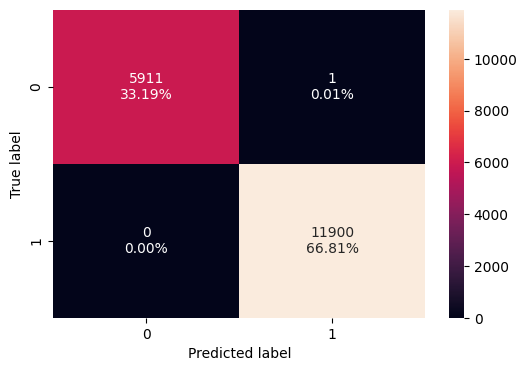

In [ ]:
confusion_matrix_sklearn(rf,X_train,y_train)

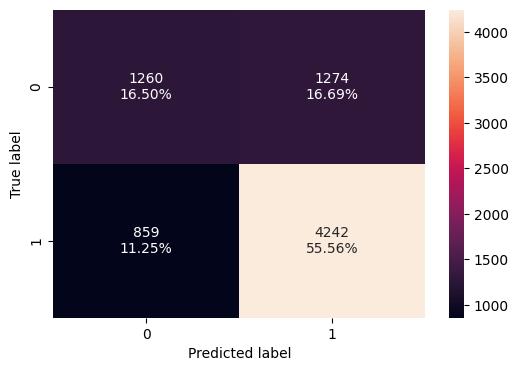

In [ ]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [ ]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.720629  0.831602   0.769036  0.799096


**Observation:**
* Random Forest is overfitting badly on the train set.

###Random forest with class weights

In [ ]:
rf_wt = RandomForestClassifier(class_weight={0:0.17,1:0.83}, random_state=1)
rf_wt.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

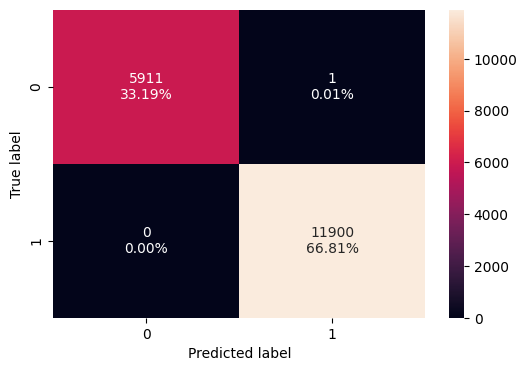

In [ ]:
confusion_matrix_sklearn(rf_wt, X_train,y_train)

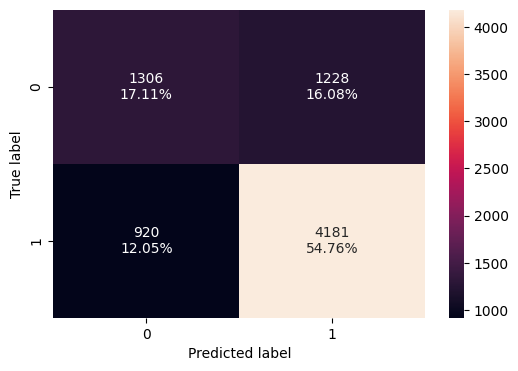

In [ ]:
confusion_matrix_sklearn(rf_wt, X_test,y_test)

In [ ]:
rf_wt_model_train_perf=model_performance_classification_sklearn(rf_wt, X_train,y_train)
print("Training performance \n",rf_wt_model_train_perf)
rf_wt_model_test_perf=model_performance_classification_sklearn(rf_wt, X_test,y_test)
print("Testing performance \n",rf_wt_model_test_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.999944     1.0   0.999916  0.999958
Testing performance 
    Accuracy    Recall  Precision        F1
0  0.718664  0.819643   0.772971  0.795623


**Observation:**
* There is not much improvement in metrics of weighted random forest as compared to the unweighted random forest.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [dtree_model_train_perf.T,
     bagging_model_train_perf.T,
     bagging_wt_model_train_perf.T,
     ab_regressor_model_train.T,
     gbcl_train.T,
     rf_model_train_perf.T,
     rf_wt_model_train_perf.T
     ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Adaboost Classifier",
    "Gradient Boost Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier"
    ]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Adaboost Classifier,Gradient Boost Classifier,Random Forest Classifier,Weighted Random Forest Classifier
Accuracy,1.0,0.984786,0.983270,1.0,0.766562,0.999944,0.999944
Recall,1.0,0.986723,0.983697,1.0,0.882689,1.000000,1.000000
Precision,1.0,0.990468,0.991194,1.0,0.791799,0.999916,0.999916
F1,1.0,0.988592,0.987431,1.0,0.834777,0.999958,0.999958


In [ ]:
# training performance comparison

models_test_comp_df = pd.concat(
    [dtree_model_test_perf.T,
     bagging_model_test_perf.T,
     bagging_wt_model_test_perf.T,
     ab_regressor_model_test_perf.T,
     gbcl_test.T,
     rf_model_test_perf.T,
     rf_wt_model_test_perf.T
     ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Bagging Classifier",
    "Weighted Bagging Classifier",
    "Adaboost Classifier",
    "Gradient Boost Classifier",
    "Random Forest Classifier",
    "Weighted Random Forest Classifier"
    ]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Bagging Classifier,Weighted Bagging Classifier,Adaboost Classifier,Gradient Boost Classifier,Random Forest Classifier,Weighted Random Forest Classifier
Accuracy,0.651866,0.703078,0.690504,0.656320,0.749443,0.720629,0.718664
Recall,0.739659,0.782396,0.752598,0.742207,0.866497,0.831602,0.819643
Precision,0.739369,0.775253,0.777126,0.743081,0.782024,0.769036,0.772971
F1,0.739514,0.778808,0.764665,0.742644,0.822096,0.799096,0.795623


* All the models are overfitting
* Among these models Gradient Boost Classifier performs best among others in terms of all performance metrics, i.e., accuracy , recall, precision, and F1-score however overfits badly on the train set.

## Actionable Insights and Recommendations

* Factors that influence the chances of getting a visa -  
  *  `education_of_employee`
  * `has_job_experience`
  * `unit_of_wage`
  * `continent`
  * `region_of_employment`

* Having a higher degree increases the chances of getting a visa.
* Having a job experience also increases the chances of getting a visa.
* Applicants having year as the unit of wage is also more likely to get visa approved.
* Asians have been granted the most Visas however coming from Europe increases the chances of getting a visa more.
* The region of employer is also an deciding factor for granting Visa, regions of Midwest has the most liklihood of getting a visa.

* To summarize, a suitable profile for the applicants for whom the visa should be certified based on the drivers that significantly influence the case status is applicants who have a **higher education**, **have job experience**, and their **wage unit is year**. Being from **Europe** and applying to employers located in **Midwest** also increase the chances of visa certification.

* For OFLC, to streamline the process of visa approval the above factors should be prioritized.